<font color='red'><h1> Threshold Based Segmentation </h1></font>

### This workbook is the python implementation of threshold based segmentation, three methods are implemented
### 1. Single threshold
### 2. Multi threshold
### 3. Entropy-based threshold

Importing libraries

In [63]:
import numpy as np
import pandas as pd
import os
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
%matplotlib inline

Input images

In [9]:
images = os.listdir('images/')

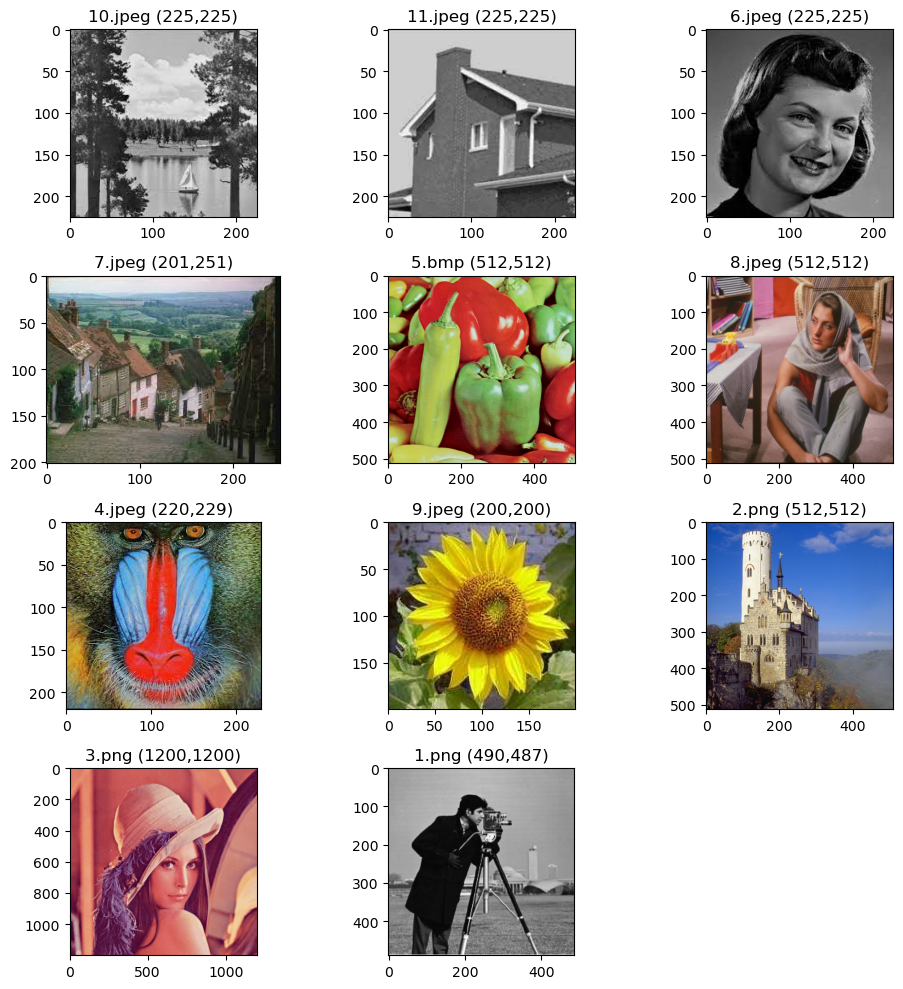

In [30]:
fig = plt.figure(figsize=(10, 10))

for i in range(len(images)):
    x = fig.add_subplot(4, 3, i+1)
    image = plt.imread('images/'+images[i])
    x.set_title("{image} ({shape[0]},{shape[1]})".format(image=images[i],shape=image.shape))
    plt.imshow(image)
    
plt.tight_layout()
plt.show()

Single threshold

In [55]:
def single_threshold(image):
    
    gray = rgb2gray(image)
    m = gray.mean()
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):    
            gray[i,j] = int(gray[i,j] > m)
            
    return gray

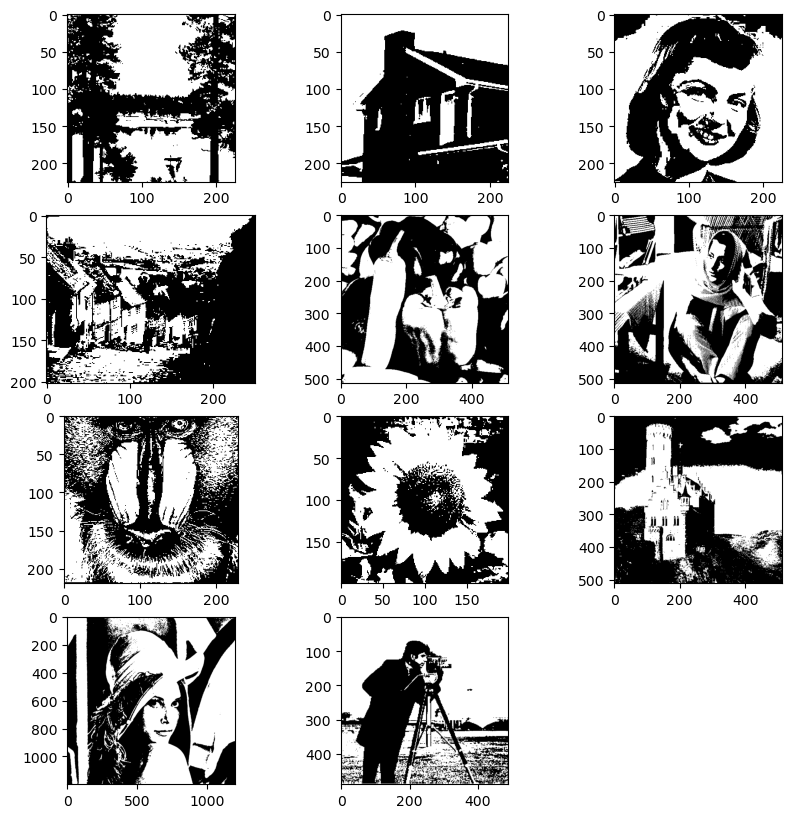

In [58]:
fig = plt.figure(figsize=(10, 10))

for i in range(len(images)):
    x = fig.add_subplot(4, 3, i+1)
    image = plt.imread('images/' + images[i])[:,:,:3]
    r2_gray = single_threshold(image)
    plt.imshow(r2_gray, cmap='gray')

Multiple thresholds

In [59]:
def multi_thresholds(image):
    
    g_image = rgb2gray(image)
    m = g_image.mean()
    m1 = 0.5 * m
    m2 = 0.25 * m
    
    for i in range(image.shape[0]):
        
        for j in range(image.shape[1]):
            pxl = g_image[i,j]
            if pxl > m:
                g_image[i,j] = 3
            elif pxl > m1:
                g_image[i,j] = 2
            elif pxl > m2:
                g_image[i,j] = 1
            else:
                g_image[i,j] = 0 
                
    return g_image

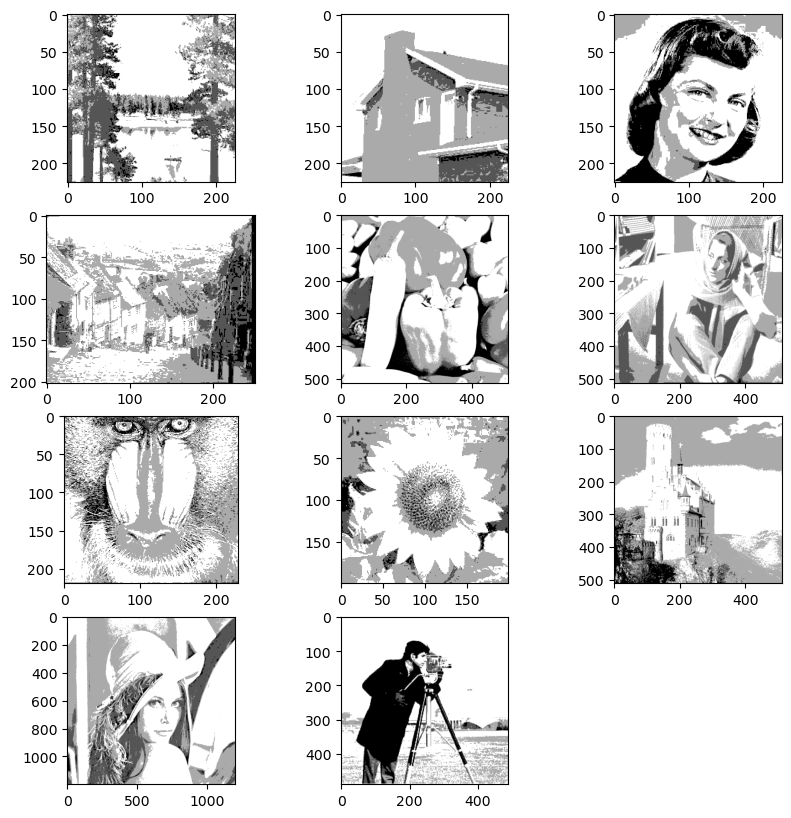

In [61]:
fig = plt.figure(figsize=(10, 10))

for i in range(len(images)):
    x = fig.add_subplot(4, 3, i+1)
    image = plt.imread('images/' + images[i])[:,:,:3]
    r2_gray = multi_thresholds(image)
    plt.imshow(r2_gray, cmap='gray')

Entropy-based threshold

In [97]:
def entropy(image, threshold):
    
    # Calculate entropy for pixels below and above the threshold
    hist_below = np.histogram(image[image <= threshold], bins=256)[0]
    hist_above = np.histogram(image[image > threshold], bins=256)[0]

    # Normalize histograms
    hist_below_normalized = hist_below / (np.sum(hist_below) + 1)
    hist_above_normalized = hist_above / (np.sum(hist_above) + 1)

    # Calculate entropy
    entropy_below = -np.sum(hist_below_normalized * np.log2(hist_below_normalized + 1e-10))
    entropy_above = -np.sum(hist_above_normalized * np.log2(hist_above_normalized + 1e-10))

    # Weighted sum of entropies
    total_entropy = (np.sum(hist_below) * entropy_below + np.sum(hist_above) * entropy_above) / np.sum(hist_below + hist_above)

    return total_entropy

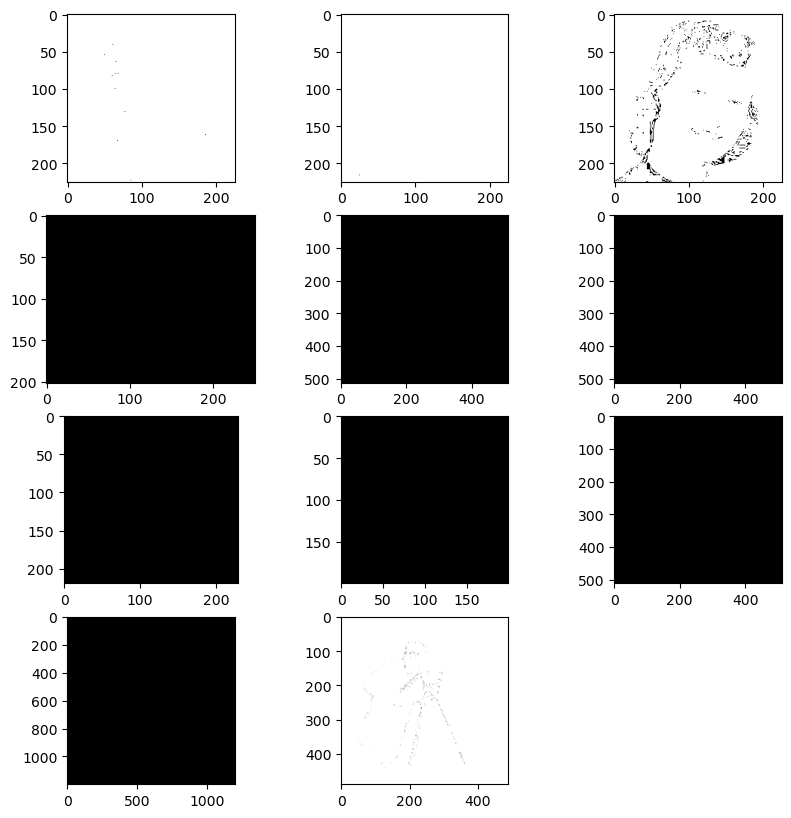

In [98]:
fig = plt.figure(figsize=(10, 10))

for i in range(len(images)):
    x = fig.add_subplot(4, 3, i+1)
    image = plt.imread('images/' + images[i])[:,:,:3]
    image = rgb2gray(image)
    
    otsu = threshold_otsu(image)
    entropies = [entropy(image, t) for t in range(256)]
    optimal_threshold = np.argmin(entropies)

    binary_image = image > optimal_threshold
    plt.imshow(binary_image, cmap='gray')